In [1]:
import pandas as pd
import shap
import sklearn

In [2]:
# a classic housing price dataset
X,y = shap.datasets.california(n_points=1000)

In [3]:
X100 = shap.utils.sample(X, 100) # 100 instances for use as the background distribution

In [4]:
# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [5]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

MedInc = 0.45769
HouseAge = 0.01153
AveRooms = -0.12529
AveBedrms = 1.04053
Population = 5e-05
AveOccup = -0.29795
Latitude = -0.41204
Longitude = -0.40125


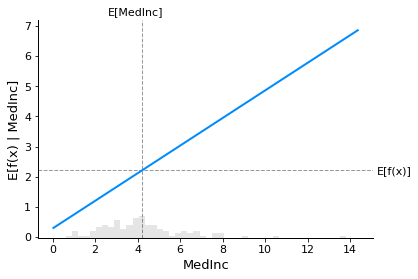

In [6]:
shap.partial_dependence_plot(
    "MedInc", model.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

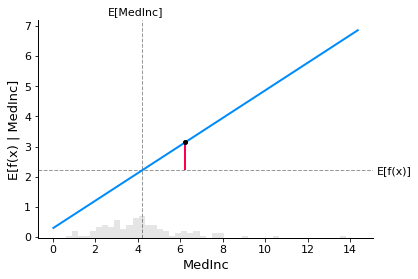

In [9]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 20
shap.partial_dependence_plot(
    "MedInc", model.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

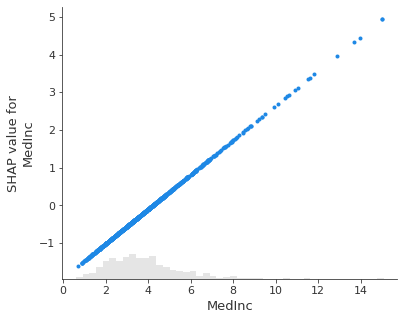

In [10]:
shap.plots.scatter(shap_values[:,"MedInc"])

In [15]:
shap_values[sample_ind]

.values =
array([ 0.92038342, -0.2210084 , -0.11332664, -0.04333158,  0.0743623 ,
        0.00746375,  0.53112064, -0.52487211])

.base_values =
2.214739832711564

.data =
array([ 6.23190000e+00,  1.00000000e+01,  6.41552063e+00,  1.01768173e+00,
        2.97500000e+03,  2.92239686e+00,  3.40100000e+01, -1.18030000e+02])

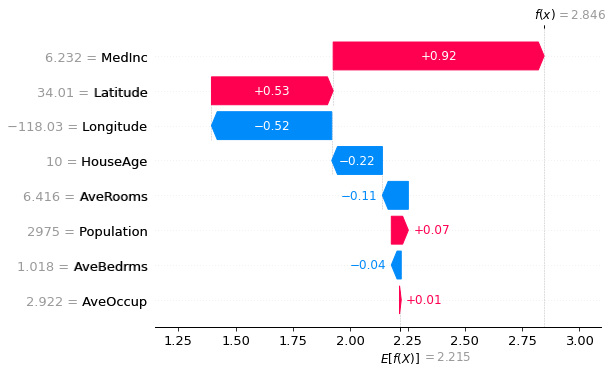

In [11]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

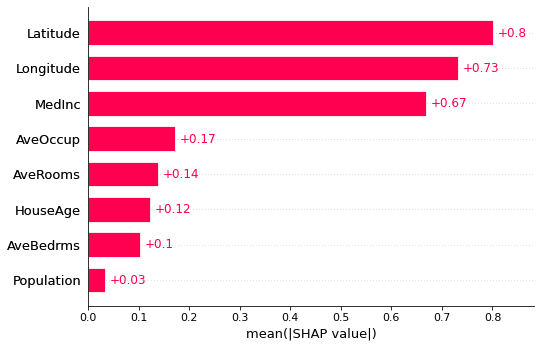

In [13]:
shap.plots.bar(shap_values)

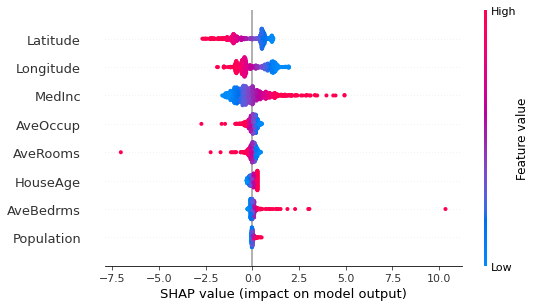

In [14]:
shap.plots.beeswarm(shap_values)